In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
# Fetch data
tickers = ['TSLA', 'BND', 'SPY']
#data = yf.download(tickers, period="1y")  # Download data for the past year
data = yf.download(tickers, start='2015-01-01', end='2025-01-31')
# Check if 'Adj Close' is in the columns
if 'Adj Close' in data.columns:
    # If it is, select only 'Adj Close' and rename columns
    data = data[['Adj Close']]
    data.columns = tickers
else:
    # If not, check if there are other relevant columns
    # like 'Close' or 'Adjusted Close'
    if 'Close' in data.columns:
        data = data[['Close']]
        data.columns = tickers
    elif 'Adjusted Close' in data.columns:
        data = data[['Adjusted Close']]
        data.columns = tickers
    else:
        raise KeyError("No relevant closing price column found in the data")

# ... (rest of the code remains the same)

# Handle missing values
data.fillna(method='ffill', inplace=True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed
C:\Users\HP\AppData\Local\Temp\ipykernel_10928\2445882449.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [5]:
# Basic statistics and data types
print(data.describe())
print(data.info())

              TSLA          BND          SPY
count  2535.000000  2535.000000  2535.000000
mean     69.289451   316.067402   117.848209
std       4.792145   117.926909   116.508288
min      61.860889   156.800888     9.578000
25%      65.565281   214.841972    17.228000
50%      68.329124   277.117920    30.298000
75%      72.879940   405.869186   221.525002
max      78.823265   609.750000   479.859985
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-01-02 to 2025-01-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TSLA    2535 non-null   float64
 1   BND     2535 non-null   float64
 2   SPY     2535 non-null   float64
dtypes: float64(3)
memory usage: 79.2 KB
None


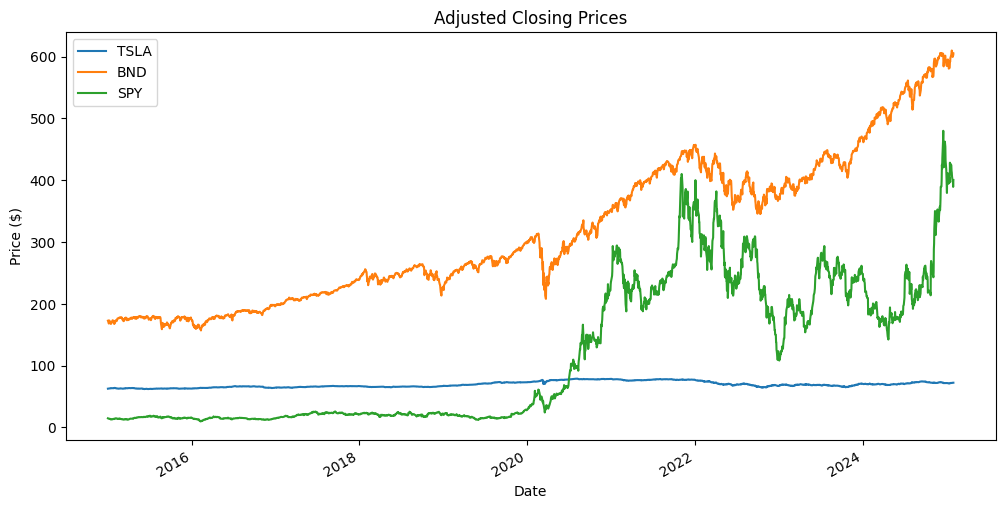

In [6]:
# Plot closing prices
data.plot(figsize=(12, 6))
plt.title('Adjusted Closing Prices')
plt.ylabel('Price ($)')
plt.show()
